In [1]:
import torch

c:\Users\Scott Hamilton\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [25]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [6]:
y = 2 * torch.dot(x, x) # y = 2xTx (xT is the transpose of x)
y

tensor(28., grad_fn=<MulBackward0>)

In [7]:
# the gradient function of y = 2xTx with respect to x is 4x
# our result should now be multiples of 4 ...
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
# ...or simply...
x.grad == 4 * x

tensor([True, True, True, True])

In [7]:
x.grad.zero_()  # Reset the gradient (must be done manually this is not done when a new gradient is recorded)
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [8]:
# non scalar
x.grad.zero_()
print(x,"\n\n")
y = x * x
print(y,"\n\n")
y.backward(gradient=torch.ones(len(y)))
print(y,"\n\n")
x.grad

tensor([0., 1., 2., 3.], requires_grad=True) 


tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>) 


tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>) 




tensor([0., 2., 4., 6.])

### Detaching computation
Why detach computation? It's commonly used to fine tune pretrained models to adapt it to new tasks. When training these models to new tasks, they may be 'frozen' in a way to prevent those gradients from updating. In an essence it's to prevent differentiation from occuring in these gradients. As a lot of NN uses differentiation.

In [8]:
# detaching computation
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [9]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [10]:
# Gradients and Python Control Flow
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c


In [23]:
#a = torch.randn(size=(), requires_grad=True)
a = torch.arange(4.0)
a.requires_grad_(True)
d = f(a)
d.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [18]:
# causes an error d.backward()

In [13]:
print(a)
a.grad == d / a

tensor(0.0773, requires_grad=True)


tensor(True)

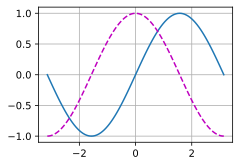

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from d2l import torch as d2l

x = np.linspace(-np.pi,np.pi,100)
x = torch.tensor(x,requires_grad=True)
y = torch.sin(x)
y.sum().backward()

d2l.plot(x.detach(),(y.detach(),x.grad))

